## This notebook is designed to give a friendly introduction to pytorch

There are many different deeplearning tools currently out there.

My personal best are Keras and Pytorch. 

Why Pytorch over tensorflow? Tensorflow is way too low level for most people... And why go low level if the library itself already obfuscates the math from us? Well, because some people want to write their own tensor operations.

But don't worry, the complexity is not worth it for most of us who want 20% of the effor and 80% of the results. We can still have access to many low level features using great packages like pytorch and have almost all the benefits.

### Why Pytorch?

Pytorch is in my opinion almost as intuitive as Keras but still lets you utilize python syntax and structures.

This means everything from the objects to the loops will look very familiar to a python coder.

Furthermore, running the training procedures using python loops means the process is not compiled and sent as a job like Keras. Instead we can write python functions to be applied each iteration for early stopping or even changing the network!

### Where do we start?

(make sure you have installed all the depenencies for using your graphics card - nvidia, cuda, cudann)

Create yourself a python environment for all your pytorch environments, in my case;  

conda create -n pytorch python=3

source activate pytorch

ipython kernel install --user --name=pytorch

I used miniconda to do this. At this point you have opened a shell inside the container to install all the tools users for this environment will need.

Using ipython to create the kernel you can run from this environment inside a jupyter notebook

First things first. Head over to the pytorch webpage and specify your installation;  
<https://pytorch.org/>

I had cuda 9 with the cudann 7.1 libraries so I run:  

conda install pytorch torchvision cudatoolkit=9.0 -c pytorch

Aaaaaaand that's it. No seriously... I have wasted away precious nights trying to get garbage tensorflow installations setup with python environments. But pytorch is amazing at compatibility!

Don't believe me? Open jupyter-notebook inside a testing folder and try my code.

### Hello world example, except I tell you those things they never really mention :)

Hop over to the following link and you will find the first pytorch introduction:

<https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py>

We will run the example so keep this page open, there is no need for me to duplicate work... These people are obviously fantastic and did a great job. I will help you with the context you don't actually know yet, the annoying pupil asking "but... where did x come from". You know who I'm talking about ;)

This example is a classification model. Like any other classifier really, but the input for this classifier is a collection of images, each with a label to predict

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
torch.cuda.is_available()

True

In [3]:
torch.cuda.current_device()

torch.cuda.set_device(0)

torch.cuda.get_device_name(0)

'GeForce GTX 1070'

Nothing to ask here, copy paste. You don't need to understand what these are quite yet...

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

Okay... I know python right? So a function, we give it a list... Each element is another function.

Help me out here.

`transforms.Compose` is a function from `torchvision` - a library only concerned with dealing with images...

This function helps define a pipeline of operations that are performed on a image or collection of immages.

One of the hardest parts of building a deep learning model is preparing the data. This will make things very easy for us!

We give `transforms.Compose` a list of opperations, in sequential order, that we want to apply.

The first operation is `transforms.ToTensor()`. This is straight forward, turn the data you recieve into a tensor. Tensors are special ndarrays (like n dimensional matrices, they run well on GPU)

The second operation is `transforms.Normalize`. It does what it says... Notice here that most images have width * height * color. Color is RGB so this image as a ndarray has 3 dimensions. We specify a mean for each dimension, and then a sd for each dimension (2 tuples of 0.5)

In [21]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


You could take this at face value... It gets data and creates interables that we can loop over to get the X and y pairs for training.

But this is a dumb way to learn! We want to be lazy, not dumb. Do things simply, understand them well.

What is REALLY happening here? Black magic?

`torchvision.datasets.CIFAR10`

There are many built in datasets you can access when learning pytorch. You can download them automatically. Pay careful attention however to how these are downloaded. This structure is the recommended structure for training using immages;  
- Root folder e.g. data  
- Batches folder  
- data batches and test batches

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. 

`torch.utils.data.DataLoader`  

This function expects a location argument, batch size, shuffle, num_workers. 

Initial training learns basic features like edges or texture. You do not have to look at many simultaneous images to learn these things. A small batch size is fine. Once the network starts learning more complex features you can train faster with larger batch sizes. BUT larger batch sizes take more memory so be careful!

A low level trick to get more of that data into memory is to convert the [0-1] input tensors as simpler data types for example float32 values to float16 values. But that I digres.

While you are training you want to shuffle the order of inputs. Many passes over the data or if the data was already ordered may lead the network to learn some hidden bias and thus score worse on validation. No need to shuffle validation, no training happens here.

In [6]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Split: train
    Root Location: ./data
    Transforms (if any): Compose(
                             ToTensor()
                             Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                         )
    Target Transforms (if any): None

Unfortunately this doesn't teach me how to do this if I had my own images? This is just a really nice wrapper for using pytorch data libraries...

To learn how to process your own images go to;  
<https://pytorch.org/tutorials/beginner/data_loading_tutorial.html>

BUT now we understand the dimensions of the data and the size of each set.

In [7]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [8]:
%matplotlib inline  

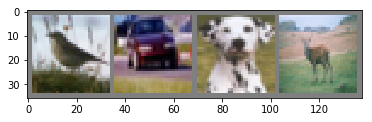

 bird   car   dog  deer


In [9]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Here we see a few tricks!

1. `imshow` is addin back the mean and multiplying by the sd. This is common knowledge for anyone who understands denormalization.  
2. `np.transpose` is called. Why? Well `Torch` and `matplotlib` have their own specification for channels first or channels last. By channels we mean number of dimensions for colors, in this case we are not gray scale, so 3 dimensions RGB and we want to swap the dimensions of our image.  
3. `trainloder` can be used as a iterable to provide an image and a label (X and y).  

In [10]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net = net.cuda()

Pytorch feels just like python structures we are familiar with!

We are creating a class or template. We can then create objects with this template.

In the Net template we specify the layers we want in our network. We don't have to duplicate the same layers, we can just call these layers over and over again.

We initialize the object with the convolutional layers and the fully connected layers (conv and fc).  

We also initialize a layer for performing max pooling. 

These are just variables we can use in our object, the order is not important.

We define the `forward` function for our class. This function specifies how the data will feed forward through our network.

x here is the batch going into the network ( for our loader we will expect a batch of 4 images, each 32x32.  

We do the convolution, apply rectified linear transformation and then finally perform the pooling.

This is repeated usin the second convolution layer.

Now we reshape the tensor data by completely flatening it like a vector or list of values. The output shape is important. `view(-1` will automatically decide the number of dimensions. If we had 10x10 elements and called x.view(-1,20) we would get a 5x20 tensor. In this case we make it a 1 x 16 * 5 * 5 tensor because we know we made 6 feature maps with 5x5 kernels in the first convolution and 16 feature maps with 5x5 kernels in the second convolution. 

This means we only look at the final convolution before we make everything flat and say 16 maps * 5 width * 5 height kernel.

Lastly notice that our final layer for our network is not activated with any function like relu. This is actually wierd for people who have used Keras.

In Pytorch the activation is part of the loss function or `criterion`

If you are going to use your GPU device or devices to train the network make sure to always send your network and the X and y data to the GPU by callin .cuda()

In [11]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

This shouldn't surpise anyone, we are doing classification.

It may be valueble to run concurrent loops and test a few reasonable paramaters with early stopping of your choice. In general sticking to the known appropriate loss functions and optimizers will give you reasonable results out the box.

In [12]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.194
[1,  4000] loss: 1.866
[1,  6000] loss: 1.673
[1,  8000] loss: 1.588
[1, 10000] loss: 1.497
[1, 12000] loss: 1.459
[2,  2000] loss: 1.402
[2,  4000] loss: 1.379
[2,  6000] loss: 1.325
[2,  8000] loss: 1.345
[2, 10000] loss: 1.290
[2, 12000] loss: 1.268
Finished Training


The training in Pytorch is not compiled! So we can do our own operations on each loop and even change the layout or batch size / parameters!

- For every training epoch (1 pass over the data)  

- As we have said before we iterate over the data loader. 

Before this batch is processed we first reset the gradients for updating the weights.  
Now we feed the network our data calling `net(` with our data.  
We measure the loss using the network output and the known labels.  
`loss.backward()` now recalculates those gradients we need to update the weights.  
And we update the weights by telling the optimizer to do a step or update.  

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

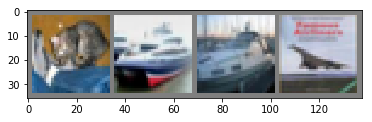

GroundTruth:    cat  ship  ship plane


In [23]:
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [25]:
outputs = net(images.cuda())

In [26]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))


Predicted:    cat plane plane plane


In [28]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.cuda()
        labels = labels.cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 55 %


Randomly picking a class would give you 10% accuracy.

`torch.max` applies an argmax over the second dimensions (1). The predicted data holds the image label predictions for a batch of 4 images, so we are talking about 4 images on the first dimension (0) and 10 label probabilities in the second dimension (1).

As shown here;


In [30]:
outputs.data

tensor([[-2.3052, -2.7285,  1.1241,  2.4526,  2.3835,  1.9879,  3.1778,  0.2916,
         -3.0572, -2.7190],
        [-2.0053, -4.1474,  2.1770,  3.2337,  0.0360,  4.9274, -0.7445,  2.1943,
         -2.4243, -2.4913],
        [ 1.9611,  2.2429,  0.2223,  0.2912,  1.6246, -1.2156, -2.9860,  0.3143,
         -1.5868, -1.8333],
        [-1.3149, -1.9906,  1.0426,  0.7702,  2.6405,  0.6520, -0.0588,  2.9074,
         -2.9705, -2.1203]], device='cuda:0')

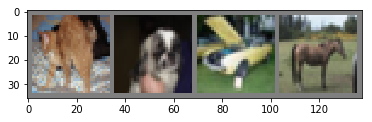

In [32]:
imshow(torchvision.utils.make_grid(images.cpu()))

Pytorch is easy to apply and very powerful!

Go forth and matrix multiply!